In [2]:
import pandas as pd
import numpy as np
import math
import operator
import sklearn
import matplotlib.pyplot as plt

In [3]:
# Importing data 
feature_names=['id',
'latitude',
'longitude',
'stars',
'type',
'specialty',
'price',
'reservation',
'name']

data = pd.read_csv('dataset.txt', delimiter=",", names=feature_names)

from sklearn import preprocessing
le = preprocessing.LabelEncoder()

# transforms strings into integers
data = data.apply(le.fit_transform)
data.tail()

,id,latitude,longitude,stars,type,specialty,price,reservation,name
115,19,57,11,11,1,3,1,1,5
116,20,60,92,8,1,3,2,1,5
117,21,53,70,14,1,4,1,1,5
118,22,56,10,9,1,3,2,0,5
119,24,41,18,12,1,3,0,1,5


In [5]:
dataset = data[['id',
'latitude',
'longitude',
'stars',
'type',
'specialty',
'price',
'reservation']].copy()

target_name = data[['name']].copy()

In [6]:
dataset.head()

,id,latitude,longitude,stars,type,specialty,price,reservation
0,0,62,23,12,1,8,2,0
1,32,116,101,6,1,8,0,0
2,43,1,89,0,0,8,2,1
3,54,61,31,2,1,8,1,1
4,65,65,17,0,0,8,2,1


In [7]:
# shows our dataset count
target_name['name'].value_counts()

5    20
4    20
3    20
2    20
1    20
0    20
Name: name, dtype: int64

In [8]:
print(dataset.shape)

(120, 8)


In [9]:
print(target_name.shape)

(120, 1)


In [11]:
from sklearn.model_selection import train_test_split
# Splitting Data into 80/20 
X_train, X_test, y_train, y_test = train_test_split(dataset, target_name, test_size=0.2,random_state=42)

In [12]:
from sklearn.neighbors import KNeighborsClassifier
#Create KNN Classifier
knn = KNeighborsClassifier(n_neighbors=5)

#Train the model using the training sets
knn.fit(X_train, y_train.values.ravel())

#Predict the response for test dataset
y_pred = knn.predict(X_test)

In [13]:
from sklearn import metrics
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5833333333333334


In [16]:
trueValues = y_test[:]

In [17]:
predValues = y_pred[:]

In [18]:
trueValues[:]

,name
44,2
47,2
4,1
55,2
26,0
64,4
73,4
10,1
40,2
107,5


In [19]:
y_pred[:]

array([2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 5, 2, 0, 0, 3, 3, 5, 5, 3, 5, 4, 2,
       0, 3])

In [20]:
from itertools import chain
trueVal = np.array(trueValues).tolist()
npa = np.asarray(trueVal)
trueVal = list(chain.from_iterable(npa))

In [22]:
predVal = np.array(y_pred).tolist()
npa = np.asarray(predVal)
predVal = list(chain.from_iterable(npa))

TypeError: 'numpy.int32' object is not iterable

In [23]:
print(predVal)

[2, 2, 2, 2, 0, 2, 2, 0, 2, 1, 5, 2, 0, 0, 3, 3, 5, 5, 3, 5, 4, 2, 0, 3]


In [24]:
print(trueVal)

[2, 2, 1, 2, 0, 4, 4, 1, 2, 5, 1, 4, 1, 0, 3, 3, 5, 1, 3, 5, 4, 2, 0, 4]


In [25]:
from sklearn.metrics import confusion_matrix
confusion_matrix(trueVal, predVal)

array([[3, 0, 0, 0, 0, 0],
       [2, 0, 1, 0, 0, 2],
       [0, 0, 5, 0, 0, 0],
       [0, 0, 0, 3, 0, 0],
       [0, 0, 3, 1, 1, 0],
       [0, 1, 0, 0, 0, 2]], dtype=int64)

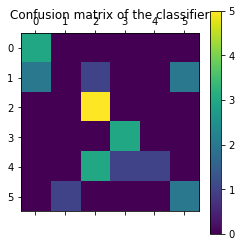

In [28]:
cm = confusion_matrix(trueVal, predVal)
plt.matshow(cm)
plt.title('Confusion matrix of the classifier')
plt.colorbar()
plt.show()